# Data Engineering  Project

### Name: Ashvini Balte

## Dataset

The dataset consists of all tweets between 01/01/2022 and 06/30/2022 containing any of the following keywords (case insensitive):



# Section I. Topic Modeling on Texts using Latent Semantic Analysis
*TF-IDF, SVD, Normalization, and K-means Clustering*

In this section, you will try to discover a set of topics discussed in a dataset of tweets.

For this task, you will use the *pandas* and *scikit-learn* packages to generate the TF-IDF matrix representing your dataset of texts. You will then apply TruncatedSVD to discover latent concepts in the data and reduce the dimensionality of the data matrix. Finally, you will use K-means clustering to group terms into clusters (topics).

## Part 1 - Load Data and Exploratory Data Analysis (EDA)

#### Part A - Read in tweets dataset

Use the pandas library to read in the provided *tweets.csv* file.

*Refer to the documentation of read_csv() if you're unsure*.

- Make sure that the date column has the appropriate datatype (converted from string to datetime).
- Make sure to check for and handle any missing values in the dataset.

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
docword_file = 'tweets.csv'

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [19]:
data = pd.read_csv("tweets.csv")
data.head()

,text,date
0,SamdGreat01 GeographyGIS Assistantships 1 2 3 4,2022-06-30 23:42:40
1,Megastarbasebal 2023 Charlotte Megastars Rotat...,2022-06-30 23:41:10
2,CKatziff Every student should have an equitabl...,2022-06-30 23:26:12
3,I’ve never walked this much outside of when I ...,2022-06-30 23:20:45
4,SamdGreat01 GeographyGIS Assistantships 1 2 3 4,2022-06-30 23:03:33


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40048 entries, 0 to 40047
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40010 non-null  object
 1   date    40048 non-null  object
dtypes: object(2)
memory usage: 625.9+ KB


In [21]:
# Chaking messing values in dataset
data.isnull().sum()

,0
text,38
date,0


In [22]:
# Delete missing values in the dataset
data.dropna(inplace = True)

In [23]:
data.head()

,text,date
0,SamdGreat01 GeographyGIS Assistantships 1 2 3 4,2022-06-30 23:42:40
1,Megastarbasebal 2023 Charlotte Megastars Rotat...,2022-06-30 23:41:10
2,CKatziff Every student should have an equitabl...,2022-06-30 23:26:12
3,I’ve never walked this much outside of when I ...,2022-06-30 23:20:45
4,SamdGreat01 GeographyGIS Assistantships 1 2 3 4,2022-06-30 23:03:33


In [24]:
data.isnull().sum()

,0
text,0
date,0


#### Part B - Time series plot

For this part, refer to the pandas *GroupBy* documentation if you are unsure.

1. Group your tweets dataframe by the date.
2. Get the size of each date "group" (i.e. the number of tweets posted each day).
3. Plot the time series of the number of tweets per day. Make sure your plot has appropriate axis labels and title.

*Look in the pandas documentation for a groupby function that returns the size of each group.*

In [25]:
import matplotlib.pyplot as plt
grouper=data.groupby(['date'])['text'].size().reset_index()
grouper.columns=["date","text"]
print(grouper)

                      date  text
0      2021-12-01 12:39:29     1
1      2021-12-01 19:11:00     1
2      2021-12-01 21:51:30     1
3      2021-12-01 23:44:09     1
4      2021-12-02 03:52:33     1
...                    ...   ...
39516  2022-06-30 23:03:33     1
39517  2022-06-30 23:20:45     1
39518  2022-06-30 23:26:12     1
39519  2022-06-30 23:41:10     1
39520  2022-06-30 23:42:40     1

[39521 rows x 2 columns]


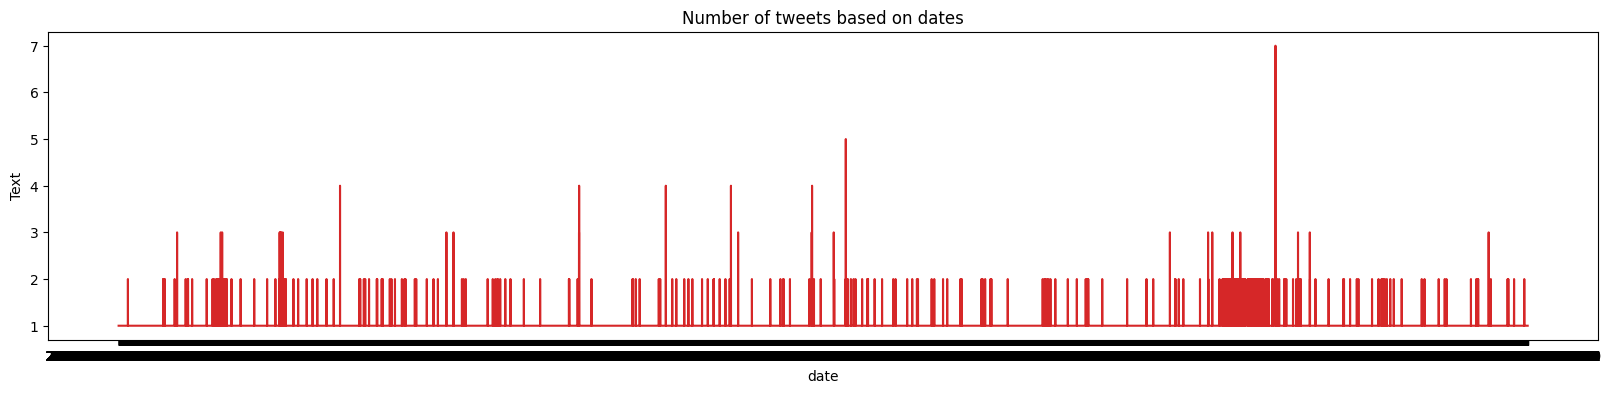

In [26]:
def data_plot(grouper, x, y, title=' ', xlabel='date', ylabel='Text', dpi=100):
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
data_plot(grouper, x=grouper['date'], y=grouper['text'], title='Number of tweets based on dates' )

**Question: What day had the maximal number of tweets mentioning UNCC?**
**Answer:

## Part 2 - TF-IDF Matrix

Create the initial TF-IDF matrix representation of our text dataset.

**Required minimum preprocessing:**
- Lowercase all text
- Remove stop words
- Set a maximum number of terms to include

**Additional preprocessing options:**
- Remove punctuation
- Lemmatize the text
- Use a more expansive stop word list
- Tune the minimum and maximum document frequencies

Python NLP libraries like *spaCy* or *NLTK* can provide additional text preprocessing and lemmatization functions.

*Refer to the scikit-learn documentation regarding initialization parameters*.

In [27]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import re
import string

import nltk
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#stop_words = stopwords.words('english')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
stop_words = stopwords.words('english')
laminate = WordNetLemmatizer()

def clean_text(text):

    text = text.lower()

    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)

    text = re.sub(r"http\S+", "",text)


    html=re.compile(r'<.*?>')

    text = html.sub(r'',text)

    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'')

    text = [word.lower() for word in text.split() if word.lower() not in stop_words]

    text = [laminate.lemmatize(word) for word in text]

    text = " ".join(text) #removing stopwords

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"  #
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis

    return text

In [29]:
data['text'] = data['text'].apply(lambda x: clean_text(x))

data.head()

,text,date
0,samdgreat geographygis assistantships,2022-06-30 23:42:40
1,megastarbasebal charlotte megastars rotation i...,2022-06-30 23:41:10
2,ckatziff every student equitable opportunity s...,2022-06-30 23:26:12
3,never walked much outside daughter used walk u...,2022-06-30 23:20:45
4,samdgreat geographygis assistantships,2022-06-30 23:03:33


In [30]:
###Tune the minimum and maximum document frequencies

max_data = 21 #ignore terms that appear in more than 50% of the documents".
min_data = 5 #ignore terms that appear less than 1% of the documents

In [31]:
data.head()

,text,date
0,samdgreat geographygis assistantships,2022-06-30 23:42:40
1,megastarbasebal charlotte megastars rotation i...,2022-06-30 23:41:10
2,ckatziff every student equitable opportunity s...,2022-06-30 23:26:12
3,never walked much outside daughter used walk u...,2022-06-30 23:20:45
4,samdgreat geographygis assistantships,2022-06-30 23:03:33


In [33]:
p = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_w = text.ENGLISH_STOP_WORDS.union(p)  # This creates a frozenset
stop_w = list(stop_w)  # Convert the frozenset to a list
dataval = data['text'].values.astype('U')
vectorizer = TfidfVectorizer(stop_words = stop_w) # Now stop_words is a list
X = vectorizer.fit_transform(dataval)

In [34]:
# create a object of term-frequency, inverse document frequency
tfidf = TfidfVectorizer(min_df = 5, lowercase = True,max_features= 21, ngram_range=(1,2), stop_words = 'english', sublinear_tf = True)

# transform each lebel into vector
feature = tfidf.fit_transform(data.text).toarray()
feature

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.76840749, 0.43105666, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.52204788, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.75266389,
        0.        ]])

In [35]:
lenth=len(feature)
lenth

40010

**Question: How many documents and how many terms are represented in our TF-IDF matrix?**

### **Answer: 40010**

## Part 3 - Latent Factor Discovery and Dimensionality Reduction

Such a high dimensional matrix is not well-suited for clustering, and individual terms do not make for very informative features. Use sklearn's TruncatedSVD to discover informative latent factors in our data and reduce the dimensionality of the document matrix.

#### Part A - Determine an appropriate number of components

1. Compute the singular value decomposition of the TF-IDF matrix using a (relatively) high number of components.

*Note: Higher numbers of components can take a much longer time to run. For reference, 500 components took ~30s on my computer.*

*To save on some compute, you can use just .fit() for this instead of fit_transform() since we will not be using the transformed matrix from this step.*

In [36]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors
svd_model_1 = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model_1.fit(X)

len(svd_model_1.components_)

20

In [38]:
tag = vectorizer.get_feature_names_out() # Use get_feature_names_out() instead of get_feature_names()

for k, comp in enumerate(svd_model_1.components_):
    tag_comp = zip(tag, comp)
    sorted_tag = sorted(tag_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(k)+": ")
    for m in sorted_tag:
        print(m[0])
        print(" ")

Topic 0: 
school
 
high
 
elementary
 
bus
 
wynbrooke
 
florida
 
unc
 
Topic 1: 
charlotte
 
unc
 
offer
 
blessed
 
receive
 
sunset
 
sunrise
 
Topic 2: 
niner
 
nation
 
let
 
ninernation
 
faithful
 
foreverfaithful
 
rmiii
 
Topic 3: 
foreverfaithful
 
rmiii
 
ninernation
 
mon
 
ride
 
faithful
 
let
 
Topic 4: 
uncc
 
low
 
sunny
 
today
 
cloudy
 
temperature
 
high
 
Topic 5: 
offer
 
blessed
 
receive
 
coachhankuncc
 
great
 
university
 
received
 
Topic 6: 
bradymanek
 
hooper
 
carolinafamily
 
uncbasketball
 
got
 
unccharlotte
 
offer
 
Topic 7: 
condition
 
rode
 
bramhaaaa
 
welcom
 
unccd
 
rough
 
reached
 
Topic 8: 
unccharlotte
 
riley
 
reed
 
charlottestrong
 
forget
 
time
 
year
 
Topic 9: 
nw
 
edt
 
pm
 
weather
 
alert
 
issued
 
statement
 
Topic 10: 
forecast
 
lifestyle
 
nw
 
riley
 
charlottestrong
 
reed
 
forget
 
Topic 11: 
forecast
 
lifestyle
 
er
 
ninernation
 
time
 
coachhankuncc
 
pm
 
Topic 12: 
jumpman
 
december
 
invitational
 
michigan

In [39]:
ste = SnowballStemmer('english')
token = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [ste.stem(word) for word in token.tokenize(text.lower())]

In [41]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(dataval)
words = vectorizer3.get_feature_names_out() # Use get_feature_names_out() for newer scikit-learn versions

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn(


2. Plot **at least one** of the following quantities:
    - Singular values
    - Explained variance
    - Explained variance ratio

*Refer to the scikit-learn documentation for TruncatedSVD to see where to find these values.*

**Question: What do you notice about the shape of the curve? In what other context have you seen a similar plot in this course?**

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect=TfidfVectorizer(min_df = 5, lowercase = True,max_features= 2, ngram_range=(1,2), stop_words = 'english', sublinear_tf = True)
s_data=vect.fit_transform(data.text).toarray()


In [43]:
df=pd.DataFrame(data=s_data, columns= data.columns)


In [44]:
df.describe()

,text,date
count,40010.000000,40010.000000
mean,0.270651,0.060847
std,0.438124,0.236046
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


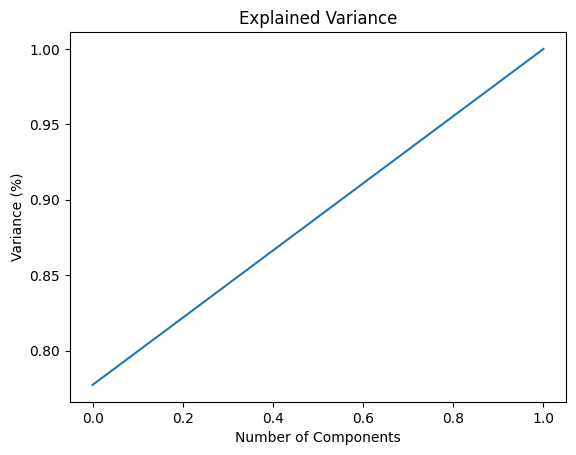

In [45]:
from sklearn.decomposition import PCA
ta = PCA()
Principal_pca = ta.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(ta.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

*Optional*: Plot the cumulative sum of the explained variance ratio. This will show you the total percentage of variance of the original matrix (y-axis) that you will capture in the reduced form matrix of size *n* components (x-axis).

*I find this to be a more interpretable version of the same information presented in the previous plot.*

*Hint: Look at the np.cumsum() function.*

In [46]:
import numpy as np
print ("Input PCA: ", Principal_pca)
pca_sum = np.cumsum(Principal_pca)
print ("cumulative sum of input : ", pca_sum)

Input PCA:  [[-0.26625873 -0.07784989]
 [ 0.73173748 -0.01457617]
 [-0.26625873 -0.07784989]
 ...
 [-0.26625873 -0.07784989]
 [ 0.73173748 -0.01457617]
 [-0.26625873 -0.07784989]]
cumulative sum of input :  [-2.66258730e-01 -3.44108618e-01  3.87628862e-01 ...  3.44108616e-01
  7.78498853e-02 -2.18570158e-09]


3. Choose what you think is an appropriate number of components based on the above plot.

In [47]:
from sklearn.decomposition import PCA
cov_matrix = PCA(n_components=len(data.columns))
cov_matrix.fit_transform(df)

array([[-0.26625873, -0.07784989],
       [ 0.73173748, -0.01457617],
       [-0.26625873, -0.07784989],
       ...,
       [-0.26625873, -0.07784989],
       [ 0.73173748, -0.01457617],
       [-0.26625873, -0.07784989]])

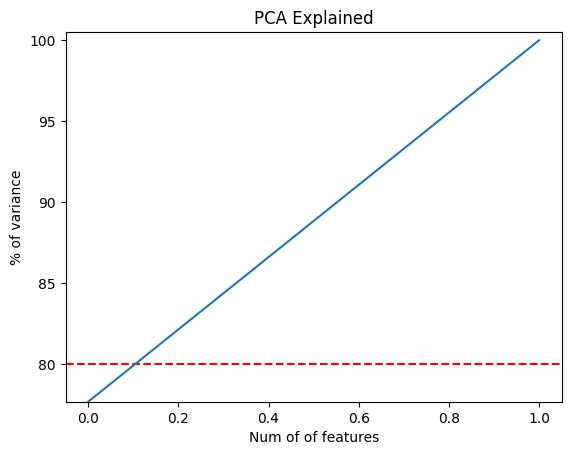

In [48]:
v=cov_matrix.explained_variance_ratio_
variable=np.cumsum(np.round(cov_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% of variance')
plt.xlabel('Num of of features')
plt.title('PCA Explained')
plt.ylim(min(variable),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(variable)
plt.show()


#### Part B - Compute the reduced form of the TF-IDF matrix

Recompute the SVD of the TF-IDF matrix with your selected number of components and transform the result to the reduced dimension matrix.

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD

from sklearn.decomposition import TruncatedSVD

n_components = 20
X_val = np.random.rand(50,100)

svd = TruncatedSVD(n_components=n_components, algorithm = 'randomized')
svd.fit_transform(X_val)
svd.explained_variance_ratio_
norma = Normalizer(copy=False)
val = make_pipeline(svd, norma)

%time \
tfidf_val = val.fit_transform(feature)

print("Explained variance for the SVD: {}%".format(int(svd.explained_variance_ratio_.sum() * 100)))

CPU times: user 533 ms, sys: 213 ms, total: 745 ms
Wall time: 384 ms
Explained variance for the SVD: 99%


**Question: What is the total percentage of explained variance of the reduced-dimension matrix?**

*To get the total explained variance percentage of the approximated matrix, compute the sum of explained variance over each individual component in the matrix.*

### **Answer: 99%**

#### Part C - Feature Normalization vs. Sample Normalization

There are many different ways to re-scale or normalize data. Most often, empirical testing is the best way to determine what normalization technique is appropriate for a given application.

- The **Normalizer()** class or **normalize** function provides normalization across *samples* (rows).
- The **StandardScaler()** class provides standardizing across *features* (columns).

Compute re-scaled versions of the data matrix, one using sample normalization and one using feature normalization, for comparison against the unnormalized version.

In [50]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(feature)
transformer

Normalizer()

In [51]:
transformer.transform(feature)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.76840749, 0.43105666, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.52204788, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.75266389,
        0.        ]])

In [52]:
from sklearn import preprocessing

In [53]:
scaler = preprocessing.StandardScaler(with_mean=False).fit(feature)
scaler

StandardScaler(with_mean=False)

In [54]:
scaler.mean_

array([0.03481728, 0.14571068, 0.01112175, 0.01075613, 0.04282302,
       0.03404237, 0.02857189, 0.01846507, 0.03567915, 0.04894665,
       0.03237764, 0.05571216, 0.039638  , 0.03980524, 0.03354271,
       0.03865628, 0.1182217 , 0.08955479, 0.14194193, 0.13574541,
       0.02338513])

In [55]:
scaler.scale_

array([0.16281784, 0.25506579, 0.05993012, 0.05819341, 0.17435298,
       0.15238699, 0.12426511, 0.09142237, 0.13985978, 0.16598594,
       0.13201677, 0.21411303, 0.15836624, 0.15930059, 0.16074756,
       0.16789014, 0.23192545, 0.20143164, 0.3295028 , 0.32026364,
       0.12014499])

In [56]:
X_scaled = scaler.transform(feature)
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [4.7194306 , 1.68998224, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.04671852, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.35013847,
        0.        ]])

## Part 4 - Clustering and Topic Modeling

Cluster the documents using the K-means algorithm, and examine the top terms associated with each cluster.

#### Part A: Determine an appropriate k-value

1. Run k-means for a series of reasonable k-values. Store the sum of squared distances of samples to their closest cluster center (available from the fitted sklearn estimator) for each k-value.
2. Plot the sum of squared distances vs k-value.
3. Determine what you think to be an appropriate value for k.

*To save a little compute, you can set n_init = 1 for the Kmeans estimator for this step.*

*Note: In my testing, the "elbow" curve in this case does not have a very good bend. Just use your best judgement to determine an appropriate k-value.*

In [57]:
import sklearn
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0.5, 0, 'k')

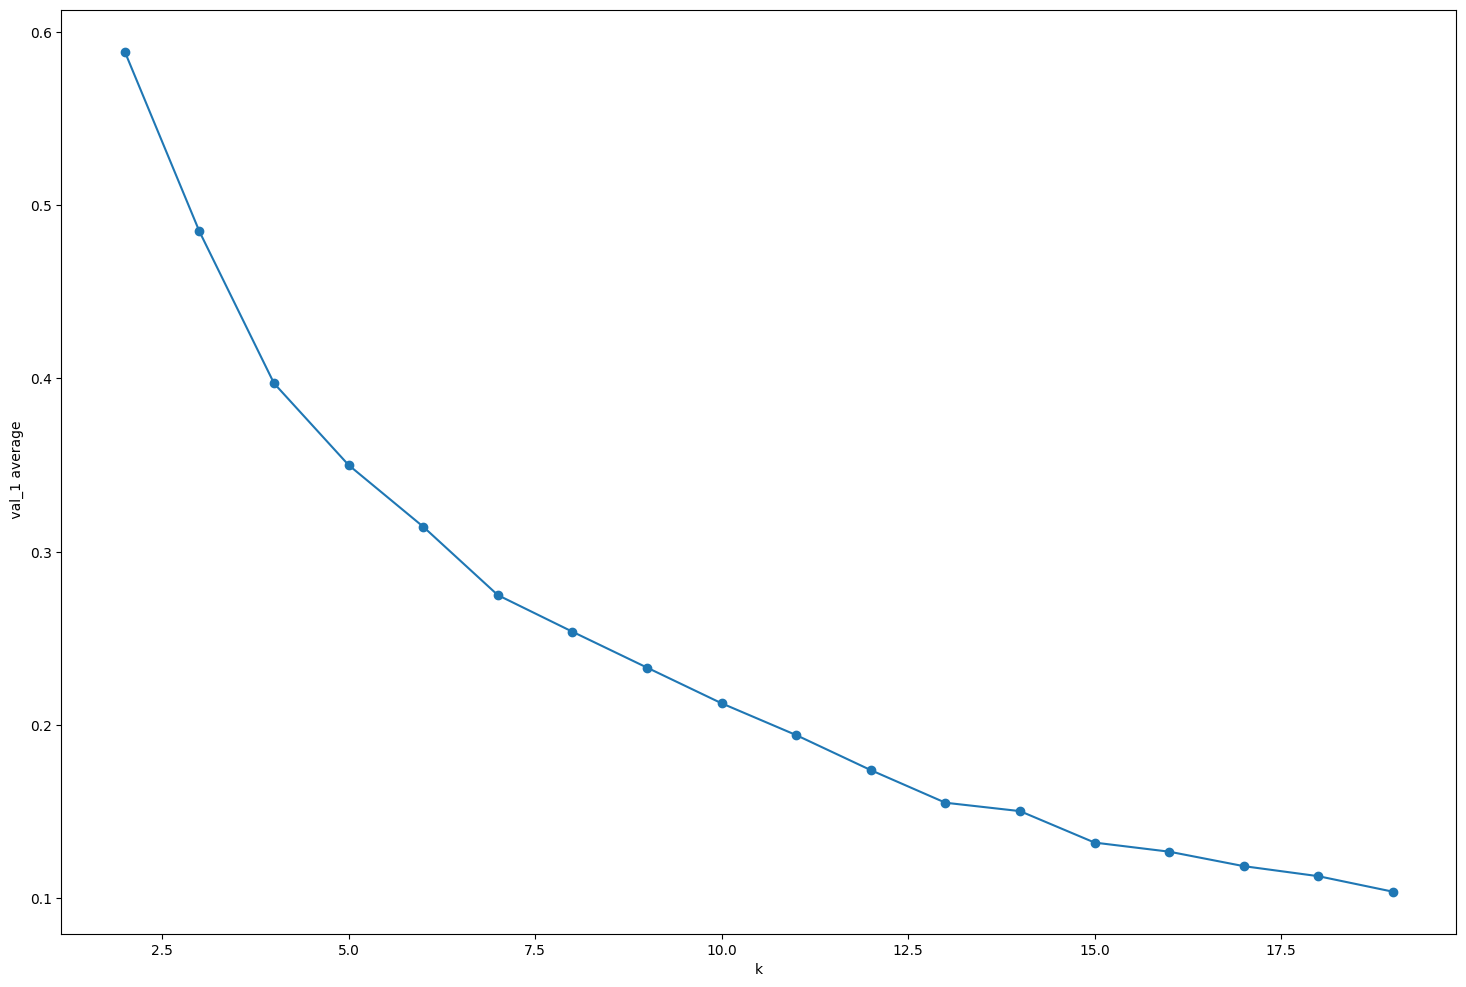

In [58]:
import scipy.spatial.distance as scdist
kmeans_range = range(2,20)
kms = [KMeans(n_clusters=k, init='k-means++').fit(feature) for k in kmeans_range]
centroids_clust = [X.cluster_centers_ for X in kms]
labels = [km.labels_ for km in kms]
k_euclidean= [scdist.cdist(feature, c, 'euclidean') for c in centroids_clust]
distance = [np.min(ke, axis=1) for ke in k_euclidean]
#Total within cluster sum of squares
val_1 = [sum(d**2) for d in distance]
val_2 = [(sum(d**2))/len(d) for d in distance]
total = sum(scdist.pdist(feature)**2)/feature.shape[0]
final = total - val_1
plt.subplots(figsize=(18, 12)) # set size
plt.plot(kmeans_range, val_2, '-o')
plt.ylabel(" val_1 average")
plt.xlabel("k")

In [59]:
from sklearn.metrics import silhouette_score, silhouette_samples
avg_score = [silhouette_score(feature, l) for l in labels]
print (avg_score)

[0.22954263932529453, 0.3183131037352898, 0.39332561973081204, 0.43041207576532015, 0.459262728737232, 0.4900374542085679, 0.509949952223711, 0.530073368363357, 0.5501693891895417, 0.5638425476207632, 0.5893683303114636, 0.6195711012099095, 0.6289157432441245, 0.6551519319018707, 0.6620863883866069, 0.6769683930148351, 0.6842011571612447, 0.6985238938793054]


In [60]:
k = 8
# default options
km =KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=k, n_init=1, random_state=None)


In [61]:
%time km.fit(feature)

CPU times: user 118 ms, sys: 60 ms, total: 178 ms
Wall time: 102 ms


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_init=1)

#### Part B: Cluster the document matrix

Fit a K-means estimator with your selected number of clusters to the **unnormalized**, reduced-dimension document matrix.

In [62]:
import sklearn
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_init = 20)
km.fit(X3)
repetitive_words = km.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(repetitive_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : uncc, unccharlott, niner, nation, charlott, ninern, unc, er, go, today, thank, day, let, time, get, student, year, amp, game, great, team, u, f, one, pm
1 : charlott, unc, offer, receiv, bless, f, coachpark, great, thank, sunset, first, coachheal, sunris, lifestyl, univers, charlotteftbl, coachrossomando, convers, hooper, bradymanek, got, carolinafamili, forecast, agtg, uncbasketbal
2 : school, high, elementari, bus, wynbrook, florida, riverview, univers, prescott, chanc, mainland, second, carmanainsworth, central, holm, counti, mississippi, blountsvill, colleg, grambl, middl, cheyenn, unc, state, south


Fit K-means estimators with your selected number of clusters to the **normalized**, reduced-dimension document matrix.

In [63]:
import sklearn
km = KMeans(n_clusters = 5, n_init = 20)
km.fit(X3)
repetitive_words = km.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(repetitive_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : f, uncc, sunset, sunris, low, unc, charlott, sunni, cloudi, temperatur, high, right, morn, condit, current, temp, good, forecast, tomorrow, today, part, clear, thunderstorm, rain, fair
1 : unccharlott, charlott, uncc, unc, ninern, thank, er, today, go, time, day, student, great, amp, get, year, team, game, u, jgaubuncc, one, coachhankuncc, pm, new, congratul
2 : niner, nation, let, ninern, er, faith, foreverfaith, rmiii, mon, ride, go, c, babi, fttb, need, day, fuck, problemz, fan, messag, welcom, get, game, u, today
3 : school, high, elementari, bus, wynbrook, florida, riverview, univers, prescott, chanc, mainland, second, carmanainsworth, central, holm, counti, mississippi, blountsvill, colleg, grambl, middl, cheyenn, unc, state, south
4 : offer, receiv, bless, charlott, unc, coachpark, first, great, thank, agtg, convers, univers, coachheal, coachrossomando, charlotteftbl, extrem, coachhankuncc, north, say, carolina, coachwestdl, coachbninerd, honor, coachdawkin, earn


In [64]:
km = KMeans(n_clusters = 7, n_init = 20)
km.fit(X3)
repetitive_words = km.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(repetitive_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : charlott, unc, jgaubuncc, coachhankuncc, today, go, time, amp, day, game, thank, year, team, u, er, f, get, new, nc, student, first, pm, one, state, got
1 : ninern, er, let, faith, foreverfaith, rmiii, mon, ride, fttb, c, niner, go, ninergang, game, ninerfaith, welcom, love, ersfaith, u, nfl, babi, fan, playoff, deebo, need
2 : unccharlott, congratul, thank, student, great, graduat, congrat, time, eralumni, chancellorgab, campus, year, today, riley, amp, charlottestrong, reed, day, histori, charlott, forget, look, work, joke, communiti
3 : school, high, elementari, bus, wynbrook, florida, riverview, univers, prescott, chanc, mainland, second, carmanainsworth, central, holm, counti, mississippi, blountsvill, colleg, grambl, middl, cheyenn, unc, state, south
4 : uncc, f, today, nw, low, good, temperatur, camp, sunni, cloudi, right, current, pm, thank, high, tomorrow, condit, get, great, edt, student, team, morn, go, alert
5 : offer, receiv, bless, charlott, unc, coachpark, first, gre

In [65]:
km = KMeans(n_clusters = 8, n_init = 20)
km.fit(X3)
# Finally, we look at 8 the clusters generated by k-means.
repetitive_words = km.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(repetitive_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : ninern, er, let, faith, foreverfaith, rmiii, mon, ride, welcom, c, fttb, niner, go, ninergang, rode, unccd, bramhaaaa, rough, reach, take, start, condit, game, ninerfaith, love
1 : unccharlott, charlott, unc, thank, today, time, jgaubuncc, coachhankuncc, go, great, student, year, day, congratul, er, get, new, game, team, u, one, first, coach, work, nc
2 : niner, nation, er, let, go, babi, need, fuck, day, messag, problemz, welcom, get, fan, post, fttb, game, champion, goldstandard, today, come, happi, u, getliketa, thank
3 : f, sunset, uncc, sunris, low, unc, charlott, sunni, cloudi, temperatur, high, right, morn, condit, current, temp, good, forecast, tomorrow, today, part, clear, thunderstorm, rain, fair
4 : uncc, camp, today, thank, great, get, team, student, go, went, day, time, email, like, come, still, year, back, alumnus, see, rain, u, charlott, got, work
5 : school, high, elementari, bus, wynbrook, florida, riverview, univers, prescott, chanc, mainland, second, carmanainswo

#### Part C: Cluster analysis

The function below will print out the top *n* words associated with each cluster centroid. The function requires the fitted sklearn estimators for TF-IDF, SVD, and K-means.

Print out the top terms associated with each cluster centroid generated from our data.

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

def get_top_terms_per_cluster(vectorizer: TfidfVectorizer, svd: TruncatedSVD, kmeans: KMeans, n_terms: int = 20):
    original_space_centroids = svd.inverse_transform(kmeans.cluster_centers_)
    cluster_word_indices = original_space_centroids.argsort()[:, :-(n_terms+1):-1]

    terms = vectorizer.get_feature_names_out()

    print('Top terms per cluster:')
    for cluster_num, word_indices in enumerate(cluster_word_indices):
        print(f'Cluster {cluster_num}:')
        for i in word_indices:
            print(f'\t{terms[i]}')
        print()

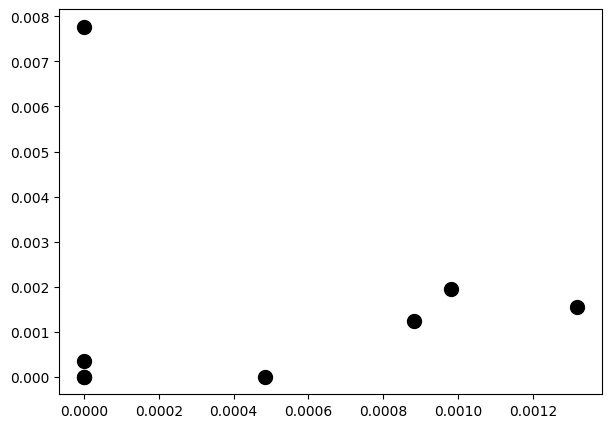

In [67]:
# Visualising the clusters
plt.figure(figsize=(7,5))
plt.scatter( km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.show()

### **Dimensionality Reduction and Plot**

In [68]:
kmeans= KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(X3)
prediction = kmeans.predict(X3)

prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, ..., 2, 2, 3], dtype=int32)

In [69]:
!pip uninstall umap
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


**Question: Choose three clusters from your results above on the dataset. Based on the top *n* terms, what general topic describes each cluster?**

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


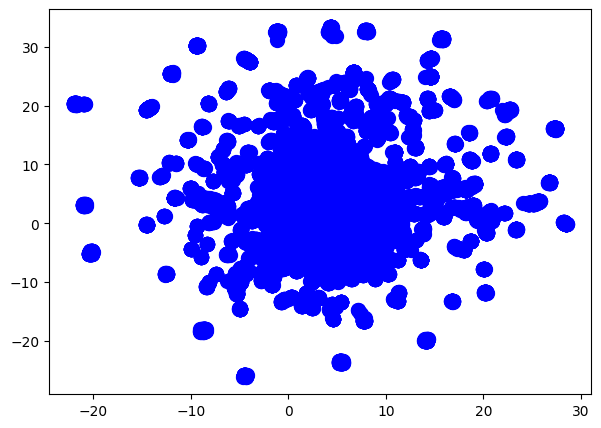

In [70]:
import umap

X_updated = svd_model_1.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_updated)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.show()

**Question: How do the clusters differ between the unnormalized and normalized data matrices?**

**Answer: based euclidian distance their id difference between normalized and unnormalized cluster**

***

# Section II. Community Detection on Social Networks

*Degree Centrality, PageRank, Community Detection, and Partition Quality*

In this section, you will compute PageRank on a social network to determine the most "influential" nodes in the network. You will also perform community detection to identify clusters (communities) of nodes in the network.

## Part 1: Load data and construct graph (10 pts)

The data are stored in an edgelist file. Use the networkx *read_edgelist()* function to read the file into a networkx Graph object.

In [71]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [73]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
nx.write_edgelist(nx.path_graph(4), "uncc_graph.edgelist")
Gm = nx.read_edgelist("uncc_graph.edgelist")

In [74]:
file_name = open("uncc_graph.edgelist", "rb")
GTX = nx.read_edgelist(file_name)
file_name.close()

In [75]:
GTX = nx.read_edgelist("uncc_graph.edgelist", nodetype=int)
GTX = nx.read_edgelist("uncc_graph.edgelist", create_using=nx.DiGraph)

In [76]:
file_open = open("uncc_graph.edgelist", "rb")

GTX = nx.read_edgelist(file_open)
print("Edge list {edge: its multiplicity} ")
print(nx.adjacency_matrix(GTX)[:20])

Edge list {edge: its multiplicity} 
  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 3)	1
  (3, 2)	1


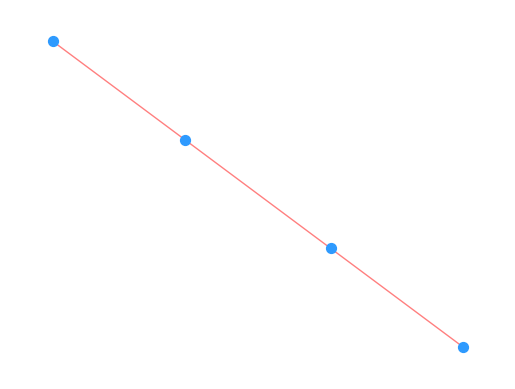

In [77]:
position = nx.spring_layout(GTX)
nx.draw_networkx_nodes(GTX, position, node_color='#2E9AFE', node_size=50)
nx.draw_networkx_edges(GTX,position,width=1.0,alpha=0.5, edge_color='r')
plt.axis('off')
plt.show()

Print the total number of nodes and edges in the network.

In [78]:
# Number of nodes
GTX.number_of_nodes()

4

In [79]:
# Number of edges
GTX.number_of_edges()

3

## Part 2: Degree Centrality and PageRank

*Note: Due to Twitter's TOS, I had to anonymize users in the graph, so we can't go beyond determining the most influential nodes. Generally, we would conduct further analysis to investigate the top nodes returned by these centrality metrics.*

There are many centrality metrics out there for measuring the most "important" nodes in a network. For this analysis, we will use degree centrality and PageRank (akin to eigenvector centrality).

#### Part A: Degree centrality

1. Compute the degree centrality for all nodes in the graph.
2. Print out the top 20 nodes with the highest degree centrality.

In [81]:
print("Degree centrality {vertex: centrality} ")
print(nx.closeness_centrality(GTX))
print("Closeness centrality:")
print(nx.closeness_centrality(GTX))

print("Betweenness centrality:")
print(nx.betweenness_centrality(GTX))

print("Eigenvector centrality :")
print(nx.eigenvector_centrality(GTX))

Degree_centrality = nx.degree_centrality(GTX)
Closeness_centrality = nx.closeness_centrality(GTX)
betweenness_centrality = nx.betweenness_centrality(GTX,normalized=False)
eigenvector_centrality = nx.eigenvector_centrality(GTX)
print("Local clustering coefficient: " )
print(nx.clustering(GTX))

print("Global clustering coefficient: ")
print(nx.transitivity(GTX))

print("The assortativity ccoefficient: ")
print(nx.degree_assortativity_coefficient(GTX))

print("The Degree Pearson correltion (same assortativity, faster algorithm) ccoefficient: ")
print(nx.degree_pearson_correlation_coefficient(GTX))

print("The average neighbor degree is: ")
print (nx.average_neighbor_degree(GTX))

print("The report for the graph using the nx.info command: ")
# Use the built-in methods for getting graph information
print("Number of nodes:", GTX.number_of_nodes())
print("Number of edges:", GTX.number_of_edges())
print("Nodes:", GTX.nodes())
print("Edges:", GTX.edges())

Degree centrality {vertex: centrality} 
{'0': 0.5, '1': 0.75, '2': 0.75, '3': 0.5}
Closeness centrality:
{'0': 0.5, '1': 0.75, '2': 0.75, '3': 0.5}
Betweenness centrality:
{'0': 0.0, '1': 0.6666666666666666, '2': 0.6666666666666666, '3': 0.0}
Eigenvector centrality :
{'0': 0.37174823427120085, '1': 0.6015008315175003, '2': 0.6015008315175004, '3': 0.3717482342712008}
Local clustering coefficient: 
{'0': 0, '1': 0, '2': 0, '3': 0}
Global clustering coefficient: 
0
The assortativity ccoefficient: 
-0.4999999999999988
The Degree Pearson correltion (same assortativity, faster algorithm) ccoefficient: 
-0.5
The average neighbor degree is: 
{'0': 2.0, '1': 1.5, '2': 1.5, '3': 2.0}
The report for the graph using the nx.info command: 
Number of nodes: 4
Number of edges: 3
Nodes: ['0', '1', '2', '3']
Edges: [('0', '1'), ('1', '2'), ('2', '3')]


#### Part B: PageRank

1. Compute PageRank for all nodes in the graph.
2. Print out the top 20 with the highest PageRank.

In [82]:
def mypagerank(Graph, alpha=0.85, max_iter=100, toll=1.0e-6, weight='weight'):
    if len(Graph) == 0:
        return {}

    if not Graph.is_directed():
        direct = Graph.to_directed()
    else:
        direct = Graph

    # Create a copy in (right) stochastic form
    Weight_w = nx.stochastic_graph(direct, weight=weight)
    Nodes_num = Weight_w.number_of_nodes()


    ax = dict.fromkeys(Weight_w, 1.0 / Nodes_num)

    pv = dict.fromkeys(Weight_w, 1.0 / Nodes_num)

    dangling_weights = pv
    dangling_nodes = [num for num in Weight_w if Weight_w.out_degree(num, weight=weight) == 0.0]


    for _ in range(max_iter):
        axlast = ax
        ax = dict.fromkeys(axlast.keys(), 0)
        danglesum = alpha * sum(axlast[num] for num in dangling_nodes)
        for num in ax:
            for nbr in Weight_w[num]:
                ax[nbr] += alpha * axlast[num] * Weight_w[num][nbr][weight]
        for num in ax:
            ax[num] += danglesum * dangling_weights[num] + (1.0 - alpha) * pv[num]
        error = sum([abs(ax[num] - axlast[num]) for num in ax])
        if error < Nodes_num*toll:
            return ax

In [83]:
page_rank = mypagerank(GTX, alpha=0.85)
page_rank_vector = nx.pagerank(GTX, alpha=0.85)

In [84]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity([list(page_rank.values())],[list(page_rank_vector.values())]))

[[1.]]


In [85]:
def create_pagerank_matrix(G, alpha):
    num_nodes = len(G.nodes())

    adjacent_matrix = np.zeros(shape=(num_nodes, num_nodes))
    for ed in G.edges():
        adjacent_matrix[ed[0], ed[1]] = 1

    transition_matrix = adjacent_matrix / np.sum(adjacent_matrix, axis=1).reshape(-1,1)

    random_surfer = np.ones(shape = (num_nodes, num_nodes)) / num_nodes

    absorb_nodes = np.zeros(shape = (num_nodes,))
    for node in G.nodes():
        if len(G.out_edges(node))==0:
            absorb_nodes[node] = 1
    absorb_node_matrix = np.outer(absorb_nodes, np.ones(shape = (num_nodes,))) / num_nodes

    sto_matrix = transition_matrix + absorb_node_matrix

    page_rank_matrix = alpha * sto_matrix + (1-alpha) * random_surfer
    return page_rank_matrix

In [86]:
def randomWalker(G, alpha, n_iter):
    num_nodes = len(G.nodes())
    first_state = np.ones(shape=(num_nodes,)) / num_nodes
    page_rank_mx = create_pagerank_matrix(G, alpha)

    new_first_state= first_state
    print('Running random walk..')
    NORM = []
    for i in range(n_iter):
        final_state = np.dot(np.transpose(page_rank_mx), new_first_state)

        prev_first_state = new_first_state
        new_first_state = final_state
        L2 = np.linalg.norm(new_first_state-prev_first_state)
        NORM.append(L2)
        if np.allclose(new_first_state, prev_first_state):
            print(f'Converged at {i+1} iterations..')
            break

    plt.figure(figsize=(5,4))
    plt.plot(range(i+1), NORM)
    plt.xlabel('iterations')
    plt.ylabel('Euclidean Norm')
    plt.title('Convergence plot')
    plt.show()
    return final_state

In [87]:
def create_graph(G):
    print('Directed:', nx.is_directed(G))
    print('Weighted:', nx.is_weighted(G))
    print()


    if not nx.is_directed(G):
        print('Graph converted to directed..')
        G = G.to_directed()

    print('Directed:', nx.is_directed(G))
    print()

    print('Relabelling nodes to integers..')
    number_unique_nodes = len(set(G.nodes()))
    node_to_int = dict(zip(set(G.nodes()), range(number_unique_nodes)))
    int_to_node = {v:k for k,v in node_to_int.items()}

    G = nx.relabel_nodes(G, node_to_int)

    print('Deleting all isolated nodes')
    nodes = G.nodes()
    for node in nodes:
        if len(G.edges(node))==0:
            G.remove_node(node)
    return G, int_to_node

In [88]:
def draw_graph(G, final_val, int_node, bool_final_val=False):


    tag = int_node

    try:
        group = np.array(list(map(lambda x: G.nodes[x]['club'], G.nodes())))
        tag = dict(zip(G.nodes(), group))
    except:
        pass

    if not bool_final_val:
        nx.draw(G, with_labels=True, alpha=0.8, arrows=False, labels=tag)
    else:
        nx.draw(G, with_labels=True, alpha=0.8, arrows=False, node_color = final_val, \
                                                                                        cmap=plt.get_cmap('viridis'), labels=tag)

        # adding color bar for pagerank importances
        sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('viridis'), norm=plt.Normalize(vmin = min(final_val), vmax=max(final_val)))
        sm._A = []
        plt.colorbar(sm)
    return plt

In [89]:
def run(G, alpha, n_iter):

    G, int2node = create_graph(G)
    print()
    print('Total Number of nodes = ', len(G.nodes()))
    print('Total Number of edges = ', len(G.edges()))
    print()

    final_probs = randomWalker(G, alpha, n_iter)

    assert len(final_probs) == len(G.nodes())

    assert np.allclose(np.sum(final_probs), 1)

    print()
    print('Page_Rank importance')
    print(final_probs)

    plt.figure(figsize=(25,8))
    plt.subplot(121)
    draw_graph(G, None, int2node, bool_final_val=False)
    plt.subplot(122)
    draw_graph(G, final_probs, int2node, bool_final_val=True)
    plt.show()
    return final_probs

Directed: False
Weighted: True

Graph converted to directed..
Directed: True

Relabelling nodes to integers..
Deleting all isolated nodes

Total Number of nodes =  34
Total Number of edges =  156

Running random walk..
Converged at 23 iterations..


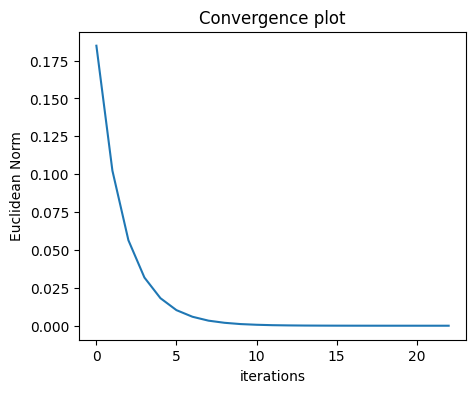


Page_Rank importance
[0.09455921 0.05152265 0.05510965 0.03520661 0.022556   0.02965355
 0.02965355 0.02429308 0.02920398 0.01491851 0.022556   0.01061031
 0.01530453 0.02892046 0.01518063 0.01518063 0.01774383 0.01519009
 0.01518063 0.01981748 0.01518063 0.01519009 0.01518063 0.0313859
 0.02167915 0.02158242 0.01581545 0.02572134 0.01981574 0.02652856
 0.02443306 0.03672917 0.07006385 0.09833262]


<ipython-input-88-daf2fd527773>:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


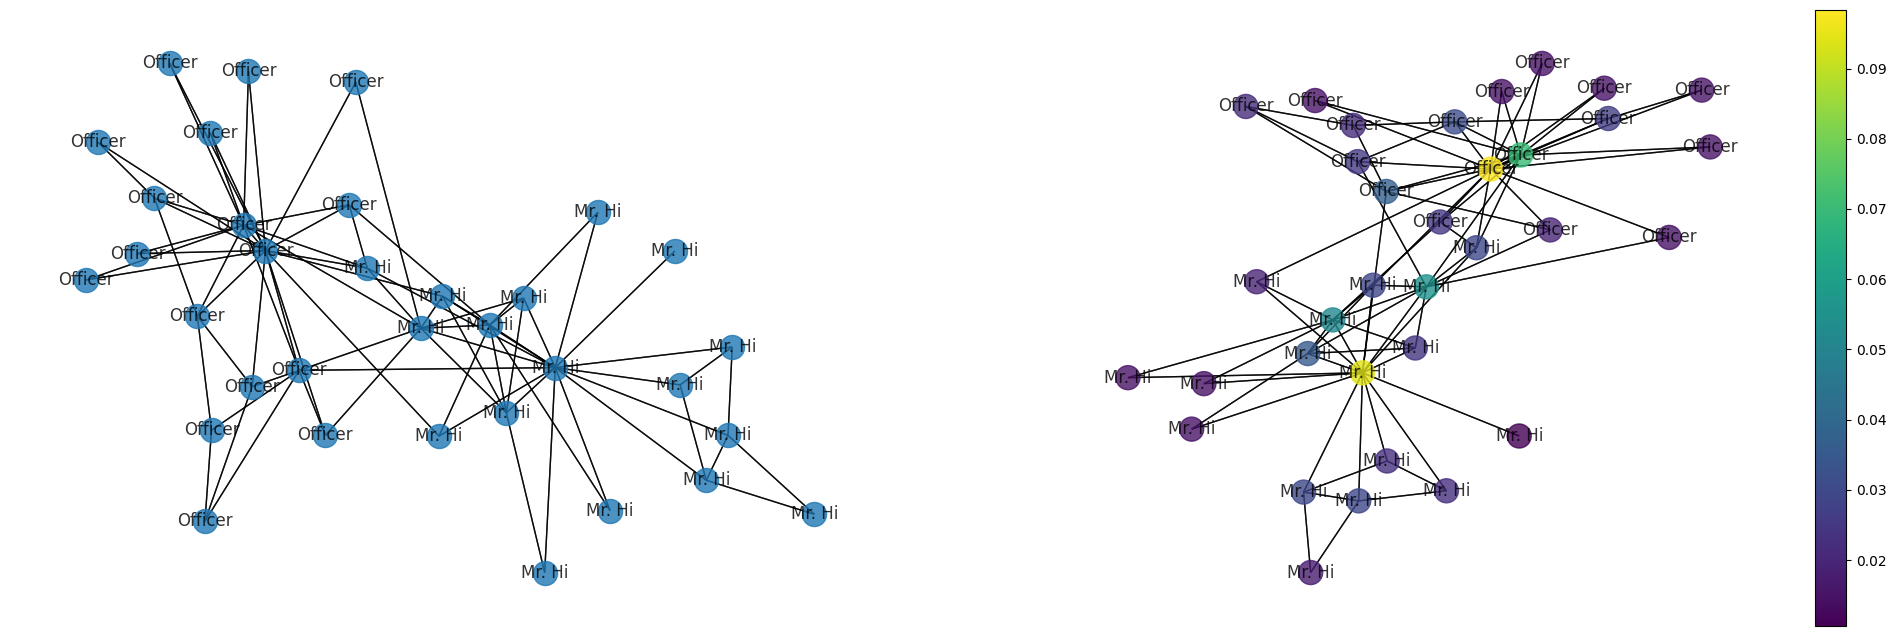

In [90]:
alpha = 0.8
n_iter = 1000

graph = nx.karate_club_graph()
final_Val = run(graph, alpha, n_iter)

Directed: False
Weighted: False

Graph converted to directed..
Directed: True

Relabelling nodes to integers..
Deleting all isolated nodes

Total Number of nodes =  32
Total Number of edges =  178

Running random walk..
Converged at 46 iterations..


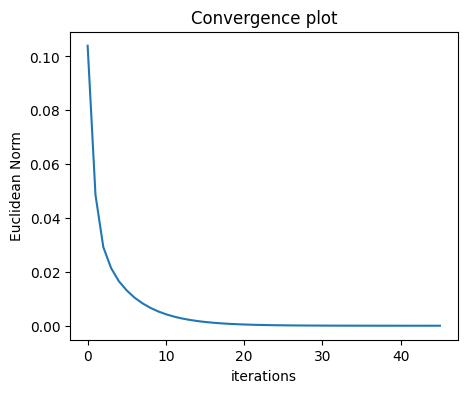


Page_Rank importance
[0.04193673 0.03691868 0.01466343 0.02319995 0.01630935 0.03659665
 0.05060149 0.04127687 0.02283931 0.02379543 0.04145404 0.07048178
 0.04095943 0.02284269 0.02340157 0.0290225  0.02836729 0.03366245
 0.03829833 0.01880887 0.01875878 0.01630935 0.02913123 0.01960249
 0.0225989  0.02339818 0.06578725 0.01884531 0.0440897  0.03218931
 0.01960249 0.03425017]


<ipython-input-88-daf2fd527773>:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


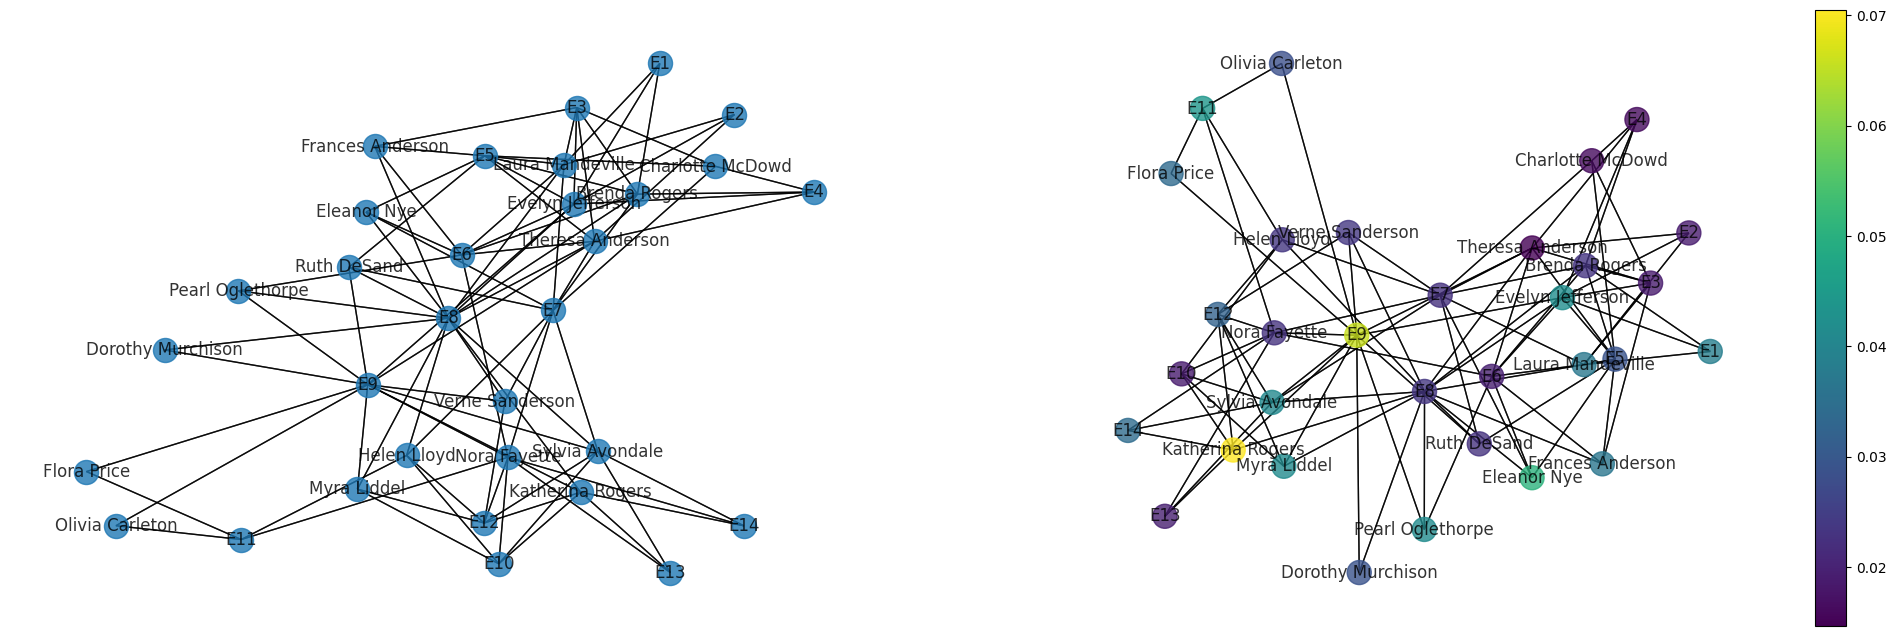

In [91]:
G = nx.davis_southern_women_graph()
final_val = run(G, alpha, n_iter)

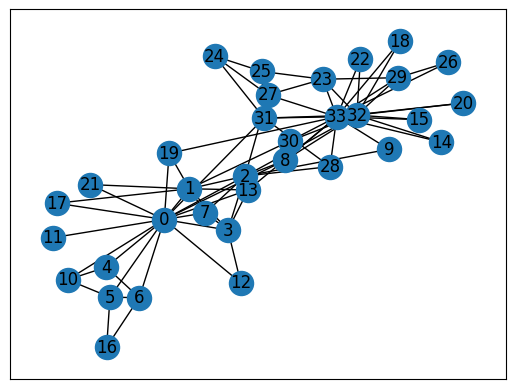

In [92]:
G = nx.karate_club_graph()
nx.draw_networkx(G)

## Part 3: Community Detection

Cluster the nodes in the network into communities using a modularity-based approach and a label propagation-based approach. As community detection is an unsupervised problem, one of the major challenges is evaluating the quality of a graph partition generated by a clustering algorithm.

Networkx provides two metrics for measuring the quality of a partition into communities.
- Modularity.
- Partition Quality (a composite of *coverage* and *performance* of a partition).

#### Part A: Greedy modularity maximization

1. Run the greedy modularity community detection algorithm on the network.
2. Compute the **modularity** and **partition quality** for the clustering result.



In [93]:
temp = nx.algorithms.community.girvan_newman(G)
type(temp)

generator

In [94]:
#Print possible communities
for i in temp:
  print(i)

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {12}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25

In [95]:
from networkx.algorithms import community
import community as community_louvain

1


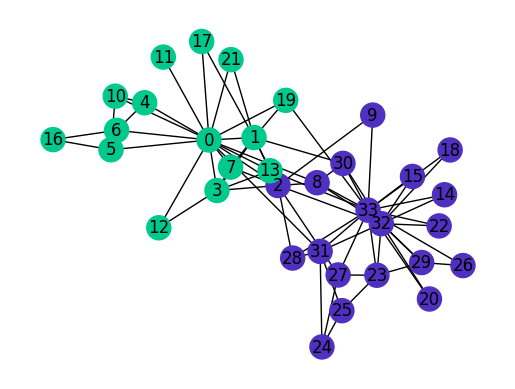

In [96]:
#Community visualization
colors = ["#00C98D", "#5030C0", "#50F0F0"]
p = nx.spring_layout(G)
Girvan_new = community.girvan_newman(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for x in Girvan_new:
  print(1)
  for c in x:
    for n in c:
      #print(n,counter)
      color_map_b[n] = colors[counter]
    counter = counter + 1
  break
nx.draw_networkx_edges(G, p)
nx.draw_networkx_nodes(G, p, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, p)
plt.axis("off")
plt.show()

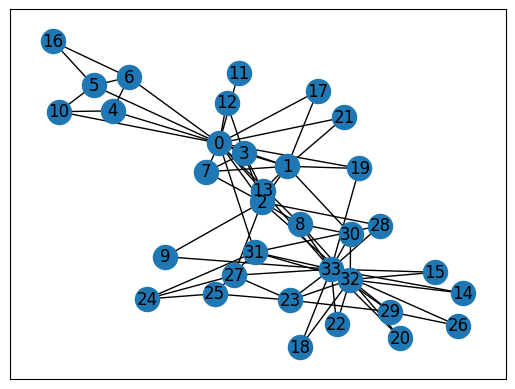

In [97]:
G = nx.karate_club_graph()
nx.draw_networkx(G)

Greedy-Mod clustering will return clusters in decreasing size.

3. Plot the size of clusters. (The curve should be a familiar shape).

**Question: How many total clusters did the modularity-based approach produce? What are the sizes of the top 10 clusters?**

In [98]:
modularity = []
for x in Girvan_new:
  modularity.append(community.modularity(G, x))
modularity

[0.3423192968647514,
 0.3580611307884035,
 0.3849721706864564,
 0.37578006409175235,
 0.3594760218136841,
 0.3470699574595678,
 0.33324900208017094,
 0.31344052772624204,
 0.3122598901819681,
 0.30368621277712193,
 0.29429733325837226,
 0.28271584115739956,
 0.27116245947414774,
 0.2544648713479881,
 0.23975375274076566,
 0.2268979217031164,
 0.22299057363992417,
 0.20056783043796028,
 0.18696238826108952,
 0.1609134011731414,
 0.1428102921609415,
 0.11768894885778003,
 0.11088622776934465,
 0.10076647738985402,
 0.08837915331421826,
 0.0562395757200952,
 0.04398343359382321,
 0.011515901126290735,
 -0.0035044320758606464,
 -0.03105264144225183,
 -0.04655085174565694,
 -0.05110473941642772]

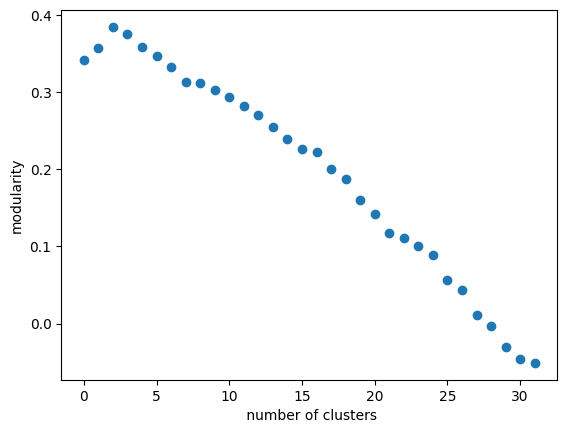

In [99]:
plt.plot(modularity, 'o')
plt.xlabel(' number of clusters')
plt.ylabel('modularity')
plt.show()

In [100]:
#Extract the community with maximum modularity
index = modularity.index(max(modularity))
i=0
for j in Girvan_new:
    if i==index:
        print(j)
        temp_val = j
    i+=1

**Question: Is the set of top nodes the same for both centrality metrics?**

*Optional: Test a few other centrality metrics or the HITS algorithm. What nodes are the most important based on these metrics?*:

**Answer: yes both node are the same**

**Question: Find the five nodes with the largest difference in rank between degree centrality and PageRank.**

**Answer: Fives nodes are 3, 7, 9, 12, 13**

#### Part B: Label propagation method

(I would have liked to use the Girvan-Newman method since that is discussed more in the slides, but its scaling is very poor and 10,000 nodes is the upper limit of what's reasonable for that algorithm.)

Another semi-supervised method (used for many things besides community detection) is label propagation. In the label propagation algorithm, each node is initially assigned to a unique community label. At each step in the algorithm, the labels of every node are propagated to their neighbors, and each node's label is updated as the most frequent label of all its neighbors. The algorithm terminates when the labels converge, i.e. no nodes change labels from one iteration to the next.

1. Run the label propagation community detection algorithm on the network.
2. Compute the **modularity** and **partition quality** for the clustering result.

In [101]:
community.greedy_modularity_communities(G)

[frozenset({8,
            14,
            15,
            18,
            20,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}),
 frozenset({0, 4, 5, 6, 10, 11, 16, 19})]

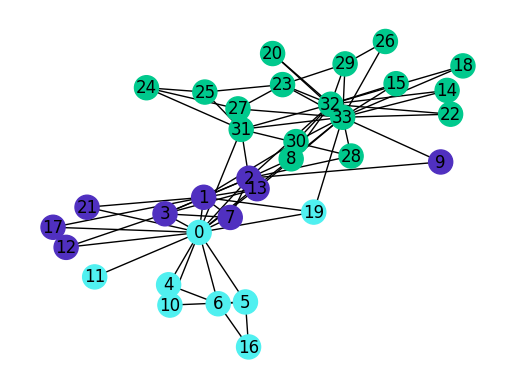

In [102]:
#Community visualization
colors = ["#00C98D", "#5030C0", "#50F0F0"]
p = nx.spring_layout(G)
greedy_modul = community.greedy_modularity_communities(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for j in greedy_modul:
  for n in j:
    color_map_b[n] = colors[counter]
  counter = counter + 1

nx.draw_networkx_edges(G, p)
nx.draw_networkx_nodes(G, p, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, p)
plt.axis("off")
plt.show()

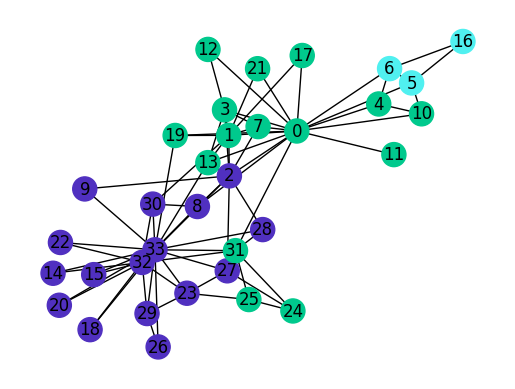

In [103]:
colors = ["#00C98D", "#5030C0", "#50F0F0"]
p = nx.spring_layout(G)
comm_prop = community.label_propagation_communities(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for j in comm_prop:
  for n in j:
    color_map_b[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, p)
nx.draw_networkx_nodes(G, p, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, p)
plt.axis("off")
plt.show()

In [104]:
!pip install python-igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.1 MB/s eta 0:00:00


In [105]:
!pip uninstall igraph -y
!pip uninstall python-igraph -y
!pip install python-igraph==0.9.6
!pip install cairocffi

Found existing installation: igraph 0.11.6
Uninstalling igraph-0.11.6:
  Successfully uninstalled igraph-0.11.6
Found existing installation: python-igraph 0.11.6
Uninstalling python-igraph-0.11.6:
  Successfully uninstalled python-igraph-0.11.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-igraph: filename=python_igraph-0.9.6-cp310-cp310-linux_x86_64.whl size=2503245 sha256=f4f63f5cd18f0ec5c1e5a94bf9442d14a5ae1fa4408c0da77b27f698c9ef14df
  Stored in directory: /root/.cache/pip/wheels/ef/14/e6/4f7a42ad0b6bbf5eb65c6358c608065dd3646c2c3b01561e84
Successfully built python-igraph
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.1 MB/s eta 0:00:00


In [106]:
import igraph as ig
g = ig.Graph.TupleList(G.edges(), directed=False)

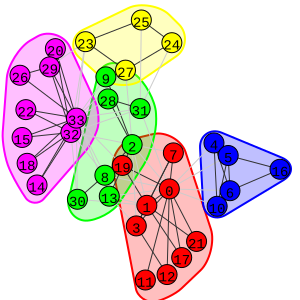

In [107]:
walk_trap = g.community_walktrap(steps = 4)
cluster = walk_trap.as_clustering()
ig.plot(cluster, mark_groups = True, bbox=(300,300), vertex_label=g.vs['name'])


*Note: Label propagation does not return communities in sorted order like greedy mod. You will need to sort the communities by size first.*

3. Plot the size of clusters.

**Question: How many clusters did the label propagation-based approach produce? What are the sizes of the top 10 clusters?**

**Answer: Total 5 cluster are produced
Size of each cluster 6-10 nodes**

**Question: Which method produced a node partition with the higher modularity? Which produced the partition with the higher partition quality?**

**Answer: the method greedy_modularity_communities gives highest modularity
Also same method produce highest partition quality**

**Question: Considering both the differences in clustering quality and runtime complexity, which community detection method would you prefer for analysis of large graphs?**

**Answer: for large graph the method prefred is greedy_modularity_communities**